In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [59]:
#{"DX": [], "DY": [], "DZ": [], "H": [], "log_f": [], "RP": []})
DATA = pd.read_csv("../csv/data.csv")
DATA.pop("Unnamed: 0")

ROW_NUM = len(DATA.index)
print(ROW_NUM)
TRAINING_NUM = int(ROW_NUM / 10 * 7)
VALIDATION_NUM = int(ROW_NUM / 20 * 3 )

TRAINING_DATA = DATA.iloc[ :TRAINING_NUM,:]
VALIDATION_DATA = DATA.iloc[TRAINING_NUM:TRAINING_NUM+VALIDATION_NUM,:]
TEST_DATA = DATA.iloc[TRAINING_NUM+VALIDATION_NUM:,:]
TRAINING_VAL = pd.DataFrame(TRAINING_DATA.pop('RP'))
VALIDATION_VAL = pd.DataFrame(VALIDATION_DATA.pop('RP'))
TEST_VAL = pd.DataFrame(TEST_DATA.pop('RP'))

DATA.pop('RP')


452864


0        -117.750391
1         -69.327201
2        -106.181961
3        -112.981354
4        -128.770041
             ...    
452859   -135.552306
452860   -155.180482
452861   -105.433740
452862   -151.030553
452863   -179.902905
Name: RP, Length: 452864, dtype: float64

In [60]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
min_max_scaler.fit(DATA)
joblib.dump(min_max_scaler, "5-10-1.scaler.gz") 

TRAINING_DATA = min_max_scaler.transform(TRAINING_DATA)
TRAINING_DATA = pd.DataFrame(TRAINING_DATA)
VALIDATION_DATA = min_max_scaler.transform(VALIDATION_DATA)
VALIDATION_DATA = pd.DataFrame(VALIDATION_DATA)
TEST_DATA = min_max_scaler.transform(TEST_DATA)
TEST_DATA = pd.DataFrame(TEST_DATA)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(10,activation="tanh", input_dim=5),
    keras.layers.Dense(10,activation="tanh"),
    keras.layers.Dense(1, activation="linear")
])

model.compile(loss="mean_squared_error", optimizer='adam')


In [62]:
history = model.fit(TRAINING_DATA, TRAINING_VAL, epochs=100, batch_size=100, validation_data=(VALIDATION_DATA, VALIDATION_VAL))


Epoch 1/100
3171/3171 [==============================] - 2s 702us/step - loss: 10335.6768 - val_loss: 7259.4619
Epoch 2/100
3171/3171 [==============================] - 2s 682us/step - loss: 5168.9297 - val_loss: 3419.0786
Epoch 3/100
3171/3171 [==============================] - 2s 676us/step - loss: 2326.1812 - val_loss: 1422.0989
Epoch 4/100
3171/3171 [==============================] - 2s 668us/step - loss: 868.7125 - val_loss: 464.0893
Epoch 5/100
3171/3171 [==============================] - 2s 678us/step - loss: 262.5353 - val_loss: 119.6543
Epoch 6/100
3171/3171 [==============================] - 2s 665us/step - loss: 65.1531 - val_loss: 32.3680
Epoch 7/100
3171/3171 [==============================] - 2s 686us/step - loss: 20.8559 - val_loss: 15.3428
Epoch 8/100
3171/3171 [==============================] - 2s 681us/step - loss: 14.0061 - val_loss: 13.9293
Epoch 9/100
3171/3171 [==============================] - 2s 691us/step - loss: 13.1045 - val_loss: 12.9101
Epoch 10/100
3171/31

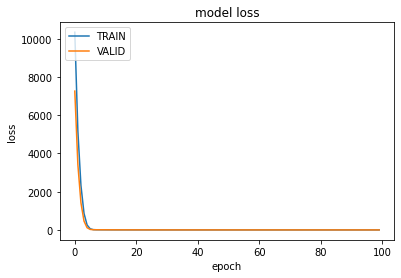

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VALID'], loc='upper left')
plt.show()

In [64]:

model.save("5-10-1.h5")
scores = model.evaluate(TEST_DATA, TEST_VAL, batch_size=20)
print(scores)


3397/3397 [==============================] - 2s 529us/step - loss: 5.8093
5.80932092666626


In [65]:
TEST_DATA = TEST_DATA.iloc[:30,:]
PREDICTIONS = pd.DataFrame(model.predict(TEST_DATA))
PREDICTIONS.columns=["PREDICITONS"]

TEST_VAL = TEST_VAL.iloc[:30,:]
TEST_VAL.columns=["TEST_VAL"]
TEST_VAL = TEST_VAL.reset_index(drop=True)

result=pd.concat([PREDICTIONS, TEST_VAL], axis=1)
result["ERROR"] = result["PREDICITONS"] - result["TEST_VAL"]
result.to_csv("5-10-1.csv")
